Match: 100% in URL: artikel/artikel3.txt


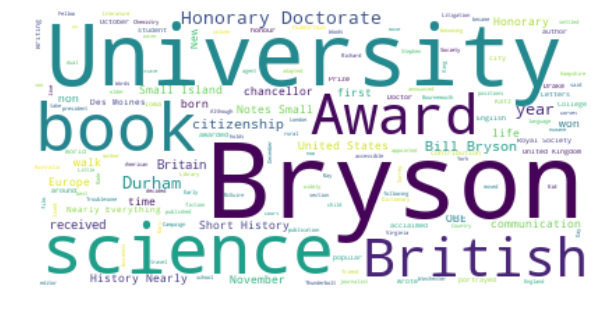

Match: 100% in URL: artikel/artikel2.txt


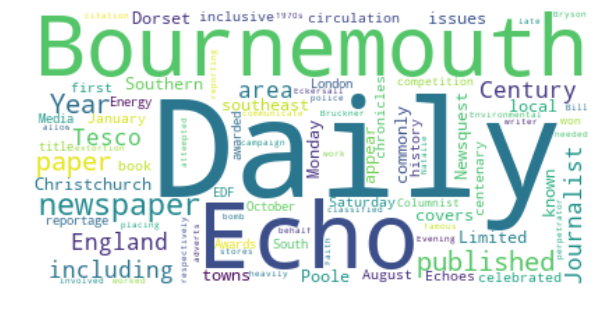

Match: 100% in URL: artikel/artikel1.txt


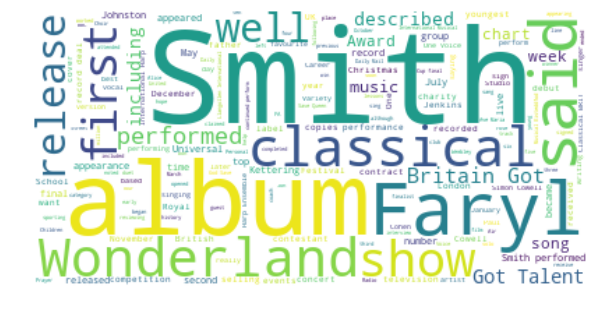

In [15]:
# Read input and preprocess data
import csv
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from fuzzywuzzy import fuzz
from ipywidgets import widgets
from IPython.display import display, clear_output


import matplotlib.pyplot as plt
% matplotlib inline

with open('articles.csv', 'r') as csvfile:
  data = [ f for f in csv.reader(csvfile) ]

mapping = { f[0] : f[1] for f in data }

search_box = widgets.Text(description="Search words:", value="South Kensington, London")
display(search_box)

def submit(sender):
    clear_output()
    
    # Search inbox.
    search = search_box.value

    # Search all articles that have the word
    ratio = [ (fuzz.token_set_ratio(f[1], search), f[0]) for f in data ]

    ratio.sort(reverse=True)
    stopwords = set(STOPWORDS)

    for x in zip(ratio, range(1, 11)):
        if x[0][0] < 30:
            continue
        print("Match: %d%% in URL: %s" %(x[0]))
        plt.figure(figsize = (10, 10))
        wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(mapping[x[0][1]])
        plt.imshow(wordcloud, interpolation='bilinear', )
        plt.axis("off")
        plt.show()

search_box.on_submit(submit)